In [ ]:
#Competitive Auctions on Ebay.com- Decision Trees contd.
#Fit another classification tree (using a tree with a minimum number of records per terminal node = 50 and maximum depth = 7), this time only with predictors that can be used for
#predicting the outcome of a new auction. Describe the resulting tree in terms of rules

In [70]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import tree
import pydotplus
import collections
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from dmba import liftChart, gainsChart


from dmba import plotDecisionTree, classificationSummary, regressionSummary
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [71]:
df = pd.read_csv('eBayAuctions.csv')


In [72]:
df['Competitive?'].value_counts()
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [73]:
df_1 = df.drop(df[(df['Competitive?'] == 1) & (df['ClosePrice'] == df['OpenPrice'])].index)
df_1.shape

(1934, 8)

In [74]:
dummies_categories = pd.get_dummies(df_1['Category']).rename(columns = lambda x: 'Category_' + str(x))
dummies_currency = pd.get_dummies(df_1['currency']).rename(columns = lambda x: 'currency_' + str(x))
dummies_endday = pd.get_dummies(df_1['endDay']).rename(columns = lambda x: 'EndDay_' + str(x))
dummies_duration = pd.get_dummies(df_1['Duration']).rename(columns = lambda x: 'Duration_' + str(x))
df_1 = pd.concat([df_1, dummies_categories, dummies_currency,dummies_endday, dummies_duration], axis = 1)

In [75]:
df_1.columns

Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?', 'Category_Antique/Art/Craft',
       'Category_Automotive', 'Category_Books', 'Category_Business/Industrial',
       'Category_Clothing/Accessories', 'Category_Coins/Stamps',
       'Category_Collectibles', 'Category_Computer', 'Category_Electronics',
       'Category_EverythingElse', 'Category_Health/Beauty',
       'Category_Home/Garden', 'Category_Jewelry', 'Category_Music/Movie/Game',
       'Category_Photography', 'Category_Pottery/Glass',
       'Category_SportingGoods', 'Category_Toys/Hobbies', 'currency_EUR',
       'currency_GBP', 'currency_US', 'EndDay_Fri', 'EndDay_Mon', 'EndDay_Sat',
       'EndDay_Sun', 'EndDay_Thu', 'EndDay_Tue', 'EndDay_Wed', 'Duration_1',
       'Duration_3', 'Duration_5', 'Duration_7', 'Duration_10'],
      dtype='object')

In [76]:
df_1 = df_1.drop(['Category','currency','endDay','Duration','ClosePrice'], axis = 1)
df_1.head()

,sellerRating,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,...,EndDay_Sat,EndDay_Sun,EndDay_Thu,EndDay_Tue,EndDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
0,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3249,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
X = df_1.loc[:, df_1.columns != 'Competitive?']

In [78]:
Y = df_1['Competitive?']

In [79]:
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.4, random_state=0)

In [80]:
valid_Y.value_counts()

1    404
0    370
Name: Competitive?, dtype: int64

In [81]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

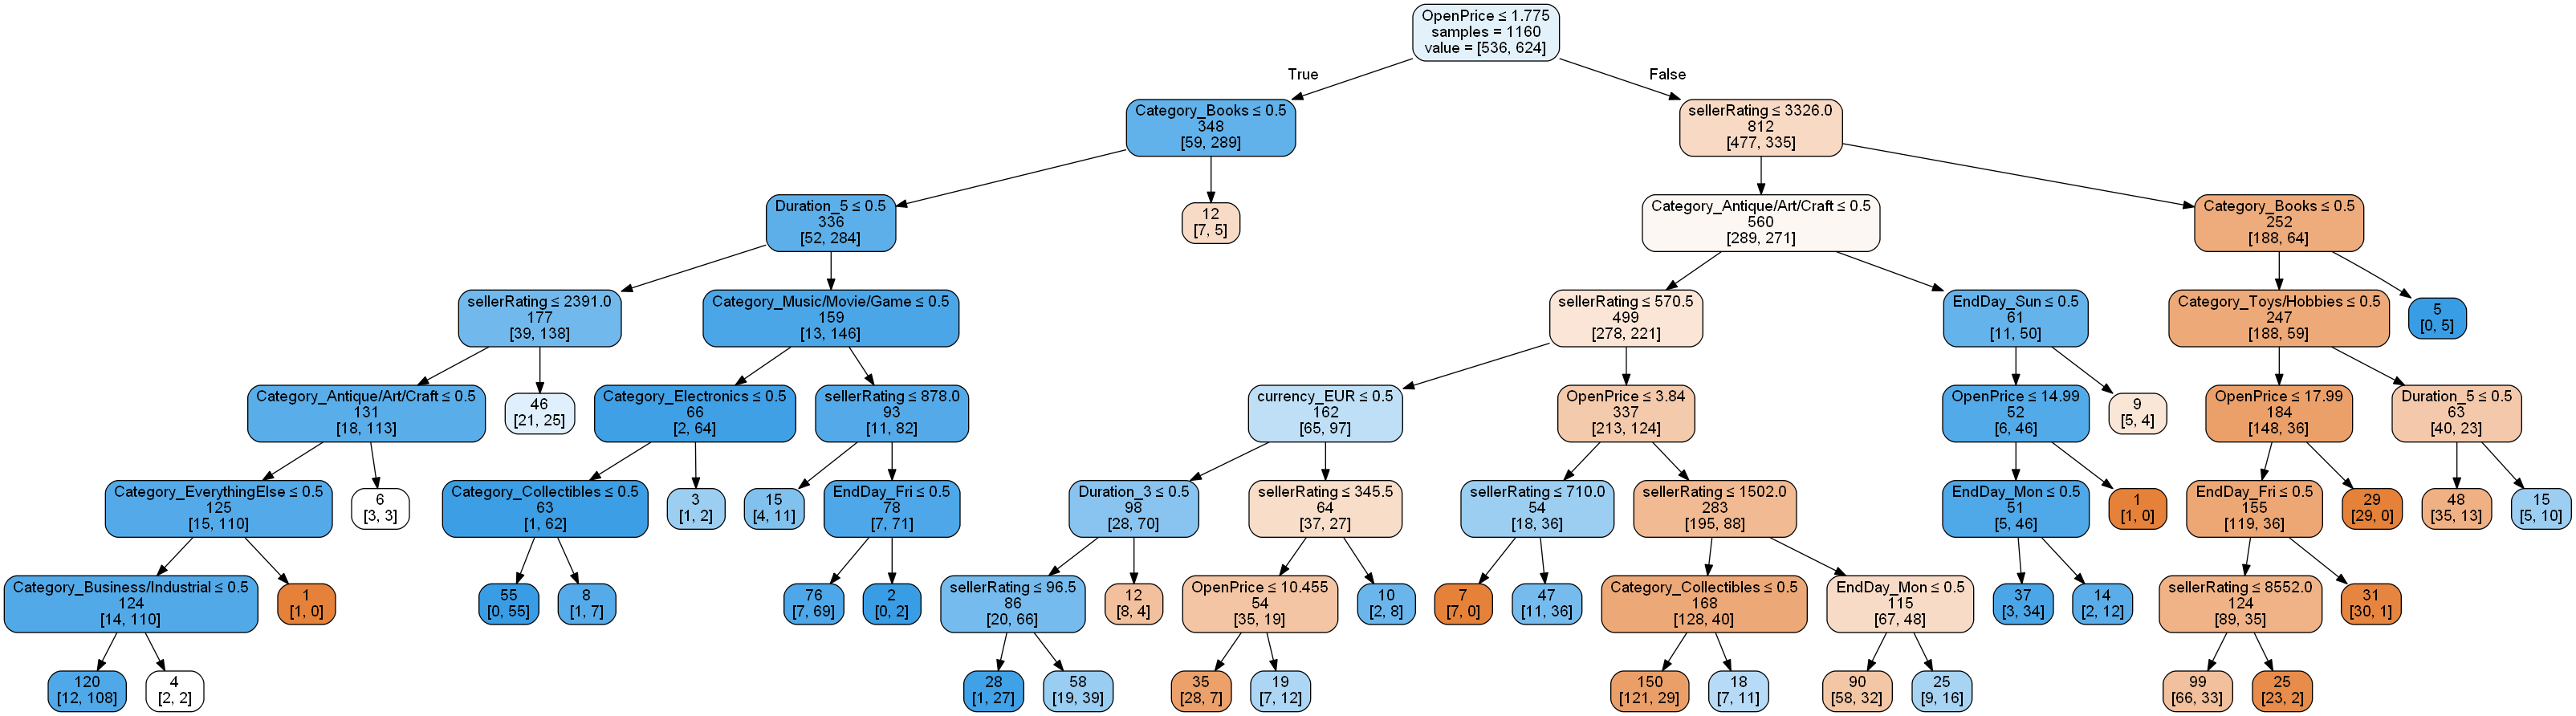

In [82]:
tree1 = DecisionTreeClassifier(min_samples_split=50, max_depth=7)
tree1.fit(train_X, train_Y)
plotDecisionTree(tree1, feature_names=train_X.columns)

In [83]:
dot_data = tree.export_graphviz(tree1,
                                feature_names=train_X.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('Question 1D.png')

True

In [84]:
n_nodes = tree1.tree_.node_count
children_left = tree1.tree_.children_left
children_right = tree1.tree_.children_right
feature = tree1.tree_.feature
threshold = tree1.tree_.threshold

In [85]:
def find_path(node_numb, path, x):
        path.append(node_numb)
        if node_numb == x:
            return True
        left = False
        right = False
        if (children_left[node_numb] !=-1):
            left = find_path(children_left[node_numb], path, x)
        if (children_right[node_numb] !=-1):
            right = find_path(children_right[node_numb], path, x)
        if left or right :
            return True
        path.remove(node_numb)
        return False


def get_rule(path, column_names):
    mask = ''
    for index, node in enumerate(path):
       
        if index!=len(path)-1:
            
            if (children_left[node] == path[index+1]):
                mask += "(df['{}']<= {}) \t ".format(column_names[feature[node]], threshold[node])
            else:
                mask += "(df['{}']> {}) \t ".format(column_names[feature[node]], threshold[node])
    
    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "")
    return mask

In [86]:
#Finding rules for Part-D
leave_id = tree1.apply(valid_X)

paths ={}
for leaf in np.unique(leave_id):
    path_leaf = []
    find_path(0, path_leaf, leaf)
    paths[leaf] = np.unique(np.sort(path_leaf))

rules = {}
for key in paths:
    rules[key] = get_rule(paths[key], train_X.columns)
rules

{7: "(df['OpenPrice']<= 1.774999976158142) & (df['Category_Books']<= 0.5) & (df['Duration_5']<= 0.5) & (df['sellerRating']<= 2391.0) & (df['Category_Antique/Art/Craft']<= 0.5) & (df['Category_EverythingElse']<= 0.5) & (df['Category_Business/Industrial']<= 0.5)  ",
 9: "(df['OpenPrice']<= 1.774999976158142) & (df['Category_Books']<= 0.5) & (df['Duration_5']<= 0.5) & (df['sellerRating']<= 2391.0) & (df['Category_Antique/Art/Craft']<= 0.5) & (df['Category_EverythingElse']> 0.5)  ",
 10: "(df['OpenPrice']<= 1.774999976158142) & (df['Category_Books']<= 0.5) & (df['Duration_5']<= 0.5) & (df['sellerRating']<= 2391.0) & (df['Category_Antique/Art/Craft']> 0.5)  ",
 11: "(df['OpenPrice']<= 1.774999976158142) & (df['Category_Books']<= 0.5) & (df['Duration_5']<= 0.5) & (df['sellerRating']> 2391.0)  ",
 15: "(df['OpenPrice']<= 1.774999976158142) & (df['Category_Books']<= 0.5) & (df['Duration_5']> 0.5) & (df['Category_Music/Movie/Game']<= 0.5) & (df['Category_Electronics']<= 0.5) & (df['Category_Col

In [87]:
predicted_Y = tree1.predict(valid_X)
predicted_Y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [88]:
tree1.score(valid_X, valid_Y)

0.7235142118863049

In [89]:
classificationSummary(train_Y, tree1.predict(train_X))
classificationSummary(valid_Y, tree1.predict(valid_X))

Confusion Matrix (Accuracy 0.7871)

       Prediction
Actual   0   1
     0 424 112
     1 135 489
Confusion Matrix (Accuracy 0.7235)

       Prediction
Actual   0   1
     0 265 105
     1 109 295


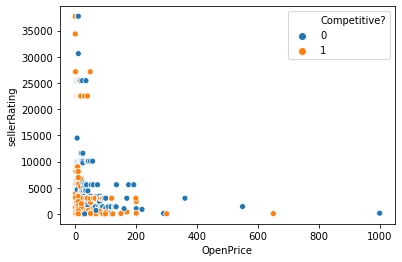

In [90]:
#PART-E(Scatter Plots)
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

ax = sns.scatterplot(x = "OpenPrice", y = "sellerRating", hue = "Competitive?", data = df)
plt.show()

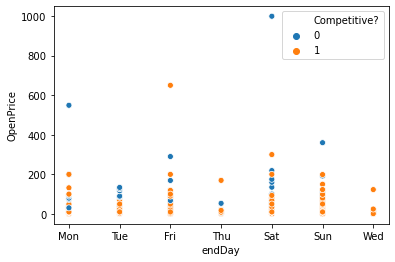

In [91]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

ax = sns.scatterplot(x = "endDay", y = "OpenPrice", hue = "Competitive?", data = df)

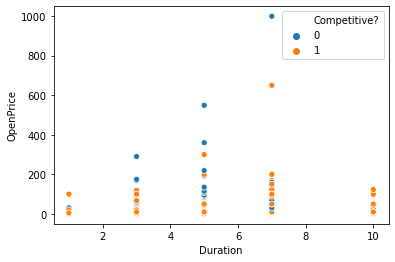

In [92]:
ax = sns.scatterplot(x = "Duration", y = "OpenPrice", hue = "Competitive?", data = df)

In [93]:
#PART-F(Lift and Gains Chart)
pred_t = tree1.predict(train_X)
pred_v = tree1.predict(valid_X)
pred_prob_v = (tree1.predict_proba(valid_X))

tree_result = pd.DataFrame({'actual': valid_Y,
                           'p(0)': [p[0] for p in pred_prob_v],
                           'p(1)': [p[1] for p in pred_prob_v],
                           'predicted': pred_v})
tree_result.head()



,actual,p(0),p(1),predicted
984,0,0.666667,0.333333,0
1156,1,0.081081,0.918919,1
507,1,0.456522,0.543478,1
1537,0,0.806667,0.193333,0
1722,0,0.666667,0.333333,0


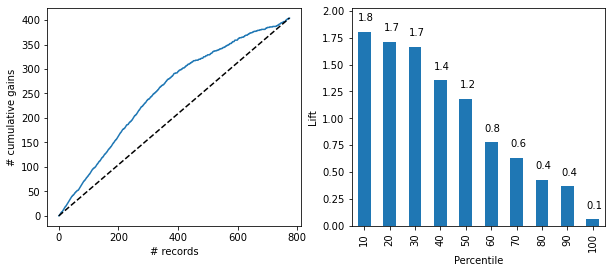

In [69]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from dmba import liftChart, gainsChart
df_1 = tree_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df_1.actual, ax=axes[0])
liftChart(df_1['p(1)'], title=False, ax=axes[1])

plt.savefig('Lift&Gains Chart.png')